
<center>MSDS 560 - Natural Language Processing</center>

# <center>Machine Learning in Python - The Basic Pipeline.</center> 

<center>Instructor - Bishnu Sarker</center> 


## 0. Problem Statement
The very first step is to define the machine learning task. 

In this practice note, our objective of the machine learning task is  predicting if a patient has diabetics or not from several of features given in the dataset. We will be working on PIMA INDIANS DIABETES DATA to predict the Onset of diabetes based on diagnostic measurements. 
The data and problem is defined here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database 

Also, a direct access to data exists through: "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv" 

The following description of the attributes of the data is taken from: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names

Here is the list of attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)     --- target variable/response variable/ depedant variable/ labels/class
   
   
 The data was part of the following publication:
 
 Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.
 
The Proposed ADAP algorithm used 576 instances for training and recorded the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances as test set. 

## 1. Download and Install Python
You should be having a working python environment from your past working experience. 

## 2. Understanding how to work with Numpy, Scipy, matplotlib and Pandas
Same goes in this case. You have working knowledge of this tools from MSDS 520/MSDS 550/MSDS 525 course. 

## 3. Importing the packages
Most cases, you will need the following packages to work with machine learning project in Python. 
1. Pandas 
2. Matplotlib
3. Numpy
4. Scipy
5. Sklearn

Let's import the above packages and also check if the system is ready for the project

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sys

## 4. Loading the dataset into Pandas DataFrame
Let's use Pandas to read the data from the online source and get it into a dataframe. 

In [2]:
data_src="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"   # data source
features=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']   # column names
data=pd.read_csv(data_src, names=features)    # pandas function for reading CSV file
print(data.shape)  # prints the shape of the dataframe. number of rows, number of columns. 

(768, 9)


#### There are 768 instances/Examples/observations/rows  and 9 features/attributes/columns/fields in the data. 

In [4]:
# First few rows of the data
data.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Last few rows of the data
data.tail(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## 5. Descriptive statistics of the data
It is always a good idea to look at the summary of the dataset. This first step often times help with feature engineering i.e. finding right features for the model. In other words, identifying the right set of columns that are explanatory of the target variable. 

Let us look into the statistical description of the data. This gives the basics statistical measure of the data. 

In [6]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


A good way to know the data type of the features/columns is to use info() function. This gives the total row/column number as well type of each columns including if there is any null values. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


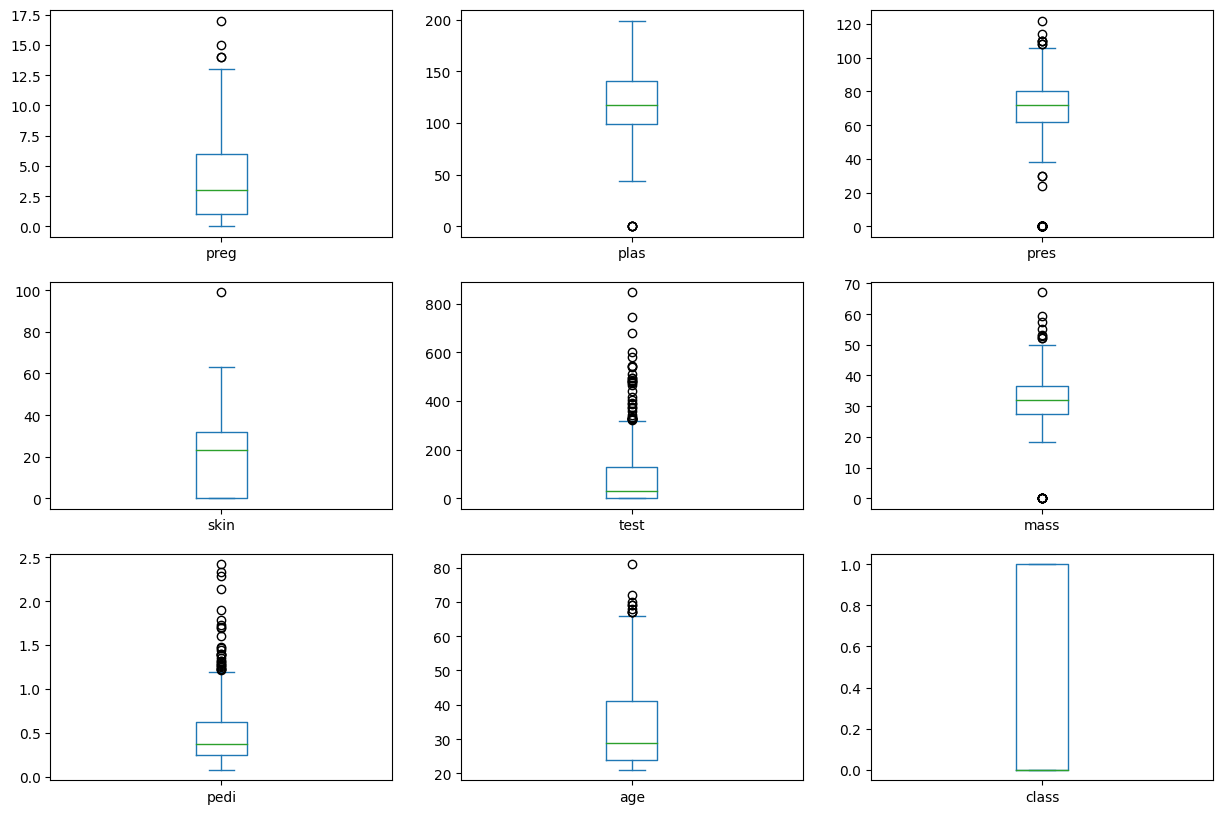

In [8]:
# This is matrix of box plots. each sub plot is a box plot for of column
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,10))
plt.show()

Box plot is a nice way to locate outliers. Above charts show that there are many points which are out of accepted range of boxplots.  

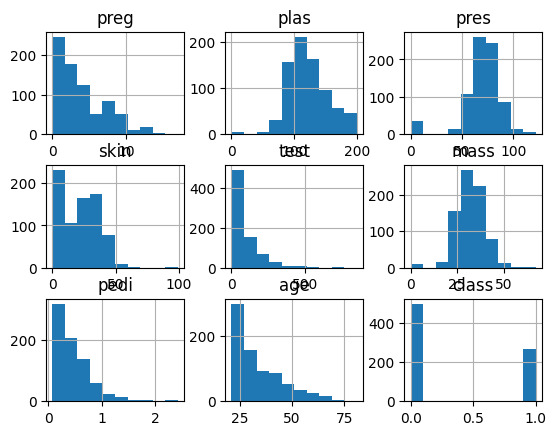

In [9]:
#Histogram of each column
data.hist()
plt.show()

There are many features which seems to be not normally distributed. This is an important insight because many machine learning learning models assume data to be normally distributed.  

Lets now count how many different classes do we have in the dataset.  groupby() is a easy way to get it.  

In [10]:
# to look at class wise counts of rows
data.groupby("class").size()

class
0    500
1    268
dtype: int64

Result shows that there are two classes: 0 and 1. For 0, there are 500 instances, for 1, there are 268 instances. This data set is class imbalance as the number of instances between 2 classes vary significantly.  

In [11]:
# This is correlation matrix between the columns
from pandas.plotting import scatter_matrix

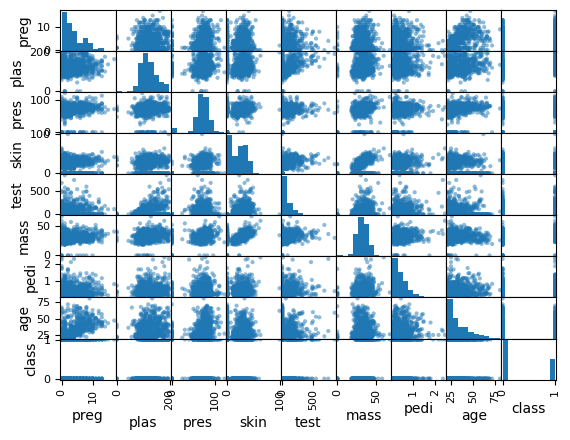

In [12]:
scatter_matrix(data)
plt.show()

scatter plot is a nice way to plot the co-relation among features.  

## 6. Normalizing/Standardization of data
Often times, the features present different measurements. It is important that we normalize the data before moving to model development. Normalization converts any data point to a uniform units. There are many normalization techniques based on the assumption of the data distribution. 

In [13]:
## From dataframe values to numpy arrays. While you can still do everything on Dataframes. Following example will show how to 
## use numpy in the process. 
data_array=data.values

In [14]:
## Again to look at the shape of the array
data_array.shape

(768, 9)

In [15]:
data_array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

Remember the last column of the dataframe was the label column. That means, the task of the model would be to predict the values of the last column given the values of the other columns i.e. features. 
lets seperate these two parts into two variable. 

In [17]:
## Seperating the feature columns and label column. In this example, the last column is the label column. 
X=data_array[:, 0:8]
Y=data_array[:,8]

In [18]:
## this is the feature matrix
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:
# this is list of labels
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

Now, lets apply the normalization function. Following normalization assumes that the data is normally distributed. thus it computes the Z-score against each value in each column. 

In [21]:
# FFunction for normalizing the numerical values. Z=(X-mean)/SD 
from sklearn.preprocessing import StandardScaler

In [22]:
rescaledX=StandardScaler().fit_transform(X)

In [23]:
rescaledX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

rescaledX holds the scaled/normalized/standarized data points of X

Once you have prepared your data matrix, the next thing is to fit a machine learning model. There are few steps: spliting the data into train and test set; fitting the model in training set; evaluating the model on test set; displaying the performance metrics to know the model strength. 

## 7. Applying Machine Learning Model
At this point, we know how to read data and pre-process data to re-scale ot nirmalize data. Now, we will see how to apply a machine learning model using SKLEARN package. 
In this step, we need some special libraries to be imported.

In [24]:
### Import the following packages for any machine learning project. 
# Preparing the dataset
from sklearn.model_selection import train_test_split   # split the dataset into training and testing set
from sklearn.model_selection import cross_val_score    # Perform cross validation 
from sklearn.model_selection import StratifiedKFold    # Stratify the data in each fold
from sklearn.model_selection import KFold              # Defining the number of fold in Cross-validation

# Evaluation Metrics
from sklearn.metrics import classification_report     # to get the performance measures
from sklearn.metrics import confusion_matrix          # To compute the false positives and false negatives
from sklearn.metrics import accuracy_score            # Accuracy measures

# Machine learning models
from sklearn.linear_model import LogisticRegression   # Logistics Regression Model
from sklearn.tree import DecisionTreeClassifier       # Decision Tree Model
from sklearn.neighbors import KNeighborsClassifier    # K-nearest Neighbor model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #LDA model
from sklearn.naive_bayes import GaussianNB                             # naive Bayes
from sklearn.svm import SVC                                            # Support Vector Machine

### I. Spliting the data into training and testing set
Essentially, following line split the rescaledX and Y into four new variables. 

- X_train: the feauture matrix for training
- X_test: the feature matrix for training
- Y_train: label vector for training
- Y_test: label vector for testing - also known as ground truth labels. 

test_size=0.2 will ensure that 80% of the rescaledX goes to training and 20% for testing. 

In [25]:
X_train, X_test, Y_train, Y_test=train_test_split(rescaledX, Y, test_size=0.2) # Adhering to 80:20 rule for train:test split

In [37]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

### II. Applying Machine Learning Model. 
Now we are going to use X_train and Y_train as our primary data for building the model. Once the model is build, we will use X_train and Y_Train to validate the performance of the model. 

Following 2 lines of code actually build a model around train data: X_train and Y_train. 

#### Logistic Regression

In [36]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [26]:
LR=LogisticRegression(solver='liblinear', max_iter=200, penalty='l1')
#fit(X_train, Y_train) 
LR.fit(X_train, Y_train) 
LR

LogisticRegression(max_iter=200, penalty='l1', solver='liblinear')

Once the model is trained, following one line can be used to predict the classes for test set. X_test

In [27]:
X_test

array([[ 1.82781311, -0.40356202, -0.16054575, ...,  0.05170968,
        -0.60365015,  0.74529338],
       [-0.54791859,  0.7857295 , -3.57259724, ..., -0.57019463,
        -0.70029395, -0.44593516],
       [-1.14185152, -1.09209922, -0.05715025, ...,  0.48323511,
        -0.70633419, -0.70119842],
       ...,
       [-0.84488505,  1.63075243,  0.25303625, ...,  0.61015436,
        -1.15935199,  0.40494237],
       [ 0.63994726,  0.81702665,  0.56322275, ..., -0.31635613,
        -0.88754131,  1.4259954 ],
       [ 0.04601433,  1.16129525,  0.45982725, ...,  0.1151693 ,
         1.00003286, -0.19067191]])

In [33]:
x1=X_test[1]
x1

array([-0.54791859,  0.7857295 , -3.57259724, -1.28821221, -0.69289057,
       -0.57019463, -0.70029395, -0.44593516])

In [34]:
Y_pred=LR.predict([x1])
Y_pred

array([1.])

In [38]:
LR.predict_proba([x1])

array([[0.48446965, 0.51553035]])

In [39]:
LR.predict_log_proba([x1])

array([[-0.72470049, -0.6625591 ]])

In [35]:
Y_test[1]

1.0

In [40]:
Y_pred=LR.predict(X_test)

In [41]:
Y_pred 

array([0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1.])

In [42]:
Y_test 

array([1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1.])

The better understand model performance, we can use following line with Y_pred : predicted classes and Y_test : actual classes. 

In [43]:
confusion_matrix(Y_test, Y_pred)

array([[89, 11],
       [25, 29]])

In [44]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       100
         1.0       0.72      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



In [36]:
confusion_matrix(Y_test, Y_pred)

array([[96,  7],
       [29, 22]])

#### Decision Tree
Decision Tree is popular machine learning model that works by generating if-then-else rules from the data. 

In [45]:
DT=DecisionTreeClassifier() 
DT.fit(X_train, Y_train)
Y_pred=DT.predict(X_test)
print(classification_report(Y_test, Y_pred)) 

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       100
         1.0       0.63      0.61      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



#### Random Forest

Apply random forest machine learning model in a similar fashion. and compare the performance. 

In [24]:
## Your code here

## 8. Model Validation
There are many ways to validate the performance of a model. Such as Cross-Validation. In cross-validation, the training data X_train will be splitted into K-folds. Each a model will be trained by taking 1 fold as test set and rest of the k-1 fold as training data. The average of the performances from K number of models will indicate the overall performance of the selected model. 

Cross-validation prevents the model overfitting as the model sees every instance for once as training and testing set. 
#### Cross-validation
To perform cross validation, following steps are necessary:

- defining the K-folds using KFold(): its takes number of folds, if data would be shufled. 
- Definig a model object. 
- Applying cross validation using cross_val_score() : it takes model, features, labels and kfolds. 

In [47]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
LR = LogisticRegression(solver='liblinear')
results = cross_val_score(LR, rescaledX,Y, cv=kfold)


In [49]:
results

array([0.81818182, 0.75324675, 0.74025974, 0.80519481, 0.79220779,
       0.77922078, 0.66233766, 0.80519481, 0.82894737, 0.73684211])

As you can see, the results prints a list of 10 numbers. These are basically accuracies from 10 different runs with 10 folds. 

We can just look into mean performance using following lines of codes

In [50]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.216% (4.760%)


Interpretation of the result: The model may perform with an accuracy of 77.216% with an deviation +/- 4.76%. Out of 100 test examples feed to the model, roughly 72 - 82 examples will be correctly classified. There is 23% chance of miss-classification.  

#### Comparing multiple models

Sometimes, to justify the superiority of a model, we need to compare with other models.

Following lines of code, 1) defines multiple machine learning models, apply cross validation on each of them, and present the mean performance for each.

As well as, it draws a set of box plots shows the performance deviations among the models and withing the k-folds. 

LR: 0.773612 (0.026665)
LDA: 0.771999 (0.021735)
KNN: 0.718112 (0.080227)
CART: 0.667768 (0.057555)
NB: 0.762295 (0.032124)
SVM: 0.768667 (0.042232)


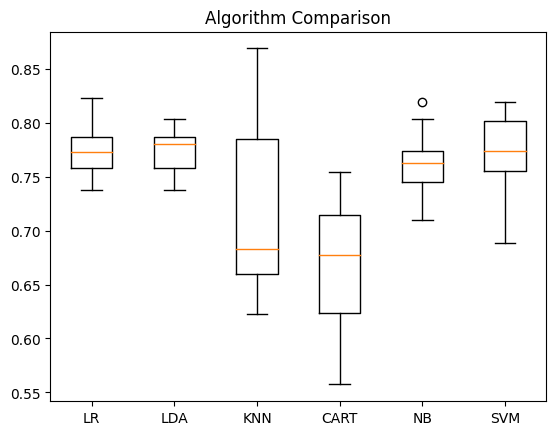

In [51]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

It may seems that training a machine learning models is fairly easy task. However, real complexity arise from finding the best fitted model. And requires a lot of efforts on tuning model parameters. So we have run the model on the default parameters. Now it is time to search for the best model. 

## 9. Tuning the model parameters to achieve best outcome. 

Well, we have got some idea about which one is performing with what accuracies. However, for each of the algorithm, it involves many parameters that requires tuning and settings to reach the goal. 
We will see how can to parameter tuning to get the best outcome. 

##### Import the grid search function from sklearn

In [52]:
from sklearn.model_selection import GridSearchCV



##### Define the model and parameters values to try

In [53]:
LR=LogisticRegression(solver='liblinear')
solvers=['lbfgs', 'sag', 'saga', 'newton-cg'] ## Possible solvers
Cs=np.logspace(-3,3,7)  # possible range of values
penalties=["l1", 'l2'] ## possible regularizers
max_iters=[50, 100, 200] ## range of iterations

params=dict(C=Cs, penalty=penalties)
params

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'penalty': ['l1', 'l2']}

##### Apply grid search to find the best parameters from the values we have selected. 

In [54]:
grid=GridSearchCV(estimator=LR, param_grid=params, cv=10)


##### Now train the model on the tuned parameters

In [55]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

We can now access a number of elements from our grid search to know better about the best fitted model. 

For example, what is the best score found? 

In [56]:
print(grid.best_score_)

0.781544156530936


What are the best parameters?

In [57]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

What is the best model/estimator built?

In [58]:
bestModel=grid.best_estimator_

In [59]:
Y_pred=bestModel.predict(X_test)
Y_pred


array([0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1.])

In [60]:
print(classification_report(Y_test,Y_pred ))

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       100
         1.0       0.71      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



## 10. Saving the model for future use. 
This is an important but missing part from many ML lecture. 

Now that you have trained a model. You have built the best model. What to do next?

The next thing is to save the model. And use it when you have a new data to classify. You don't need train the model every time. 
Train once. and use many times untill you have enough new data to training the model again. 

In [61]:
from pickle import dump, load


In [63]:
dump(bestModel, open("/kaggle/working/bestModel.model", 'wb')) 

## 11. Loading the saved model whenever we have a new data. 

In [64]:
model=load(open('/kaggle/working/bestModel.model', 'rb'))


In [65]:
Y_pred=model.predict(X_test)
#model.score(X_test, Y_test)


In [66]:
Y_pred

array([0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1.])

# Hurray!! We have done a complete Machine learning project. 


## Exercise 1
Now, let's try with the following dataset to classify IRIS flowers based on their physical features like petal length etc. 

data Source: "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv" 

Attributes list: 
'sepal-length', 'sepal-width', 'petal-length', 'petal-width',

Labels

'class' . 


In [63]:
df_iris=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv", sep=',', header=None, names=['sepal_length', 'sepal_width', 'petal_length','petal_width', 'class'])

In [64]:
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
